# Summary and Visualization
Pada proses ini hasil klasifikasi sentiment akan di rangkum berapa jumlah sentiment positive dan negative dalam rentang tanggal tertentu, dan dilakukan proses visualisasi

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Summary
Pada proses ini dilakukan menghitung jumlah tweet positive dan negative dan mengelompokkannya kedalam rentang waktu tweet tersebut ditulis

In [34]:
data = pd.read_csv('hasil.csv')
storage = [['Date', 'Positive', 'Negative']]
"""
a = data.groupby(['polarity'])
neg = a.get_group('Positive')
neg.to_csv('positive.csv', index=False)
"""


In [3]:
#fungsi untuk mendapatkan tanggal
def getDate(dates):
    tanggal = []
    for line in dates:
        if line not in tanggal:
            tanggal.append(line)
    return tanggal #mengembalikan tanggal yang unik

In [4]:
uniqueDates = getDate(data['date'])

In [5]:
#proses summary hasil klasifikasi
for line in uniqueDates:
    tmp = [line, 0, 0]
    for date, polarity in zip(data['date'], data['polarity']):
        if date == line:
            if polarity == 'Negative':
                tmp[2] += 1
            elif polarity == 'Positive':
                tmp[1] += 1
    storage.append(tmp)

In [6]:
# write to csv
f = open('insight.csv', 'w')
for item in storage:
    for i in range(len(item)):
        if i == 0:
            f.write(str(item[i]))
        else:
            f.write(',' + str(item[i]))
    f.write('\n')
f.close()

In [7]:
#baca data insight untuk time series
print('Hasil Summary Klasifikasi')
series = pd.read_csv('insight.csv')
series

Hasil Summary Klasifikasi


,Date,Positive,Negative
0,8-Jul-20,8,115
1,7-Jul-20,3,37
2,6-Jul-20,8,39
3,5-Jul-20,1,25
4,4-Jul-20,5,43
5,3-Jul-20,8,76
6,2-Jul-20,2,67
7,1-Jul-20,2,27
8,30-Jun-20,0,3


# Visualization
Hasil summary akan dilakukan visualisasi agar bisa dianalisis

In [8]:
#masukkan data ke array, date,positive dan negative array
date = series['Date']
date = date[::-1]

positive = series['Positive']
positive = positive[::-1]

negative = series['Negative']
negative = negative[::-1]

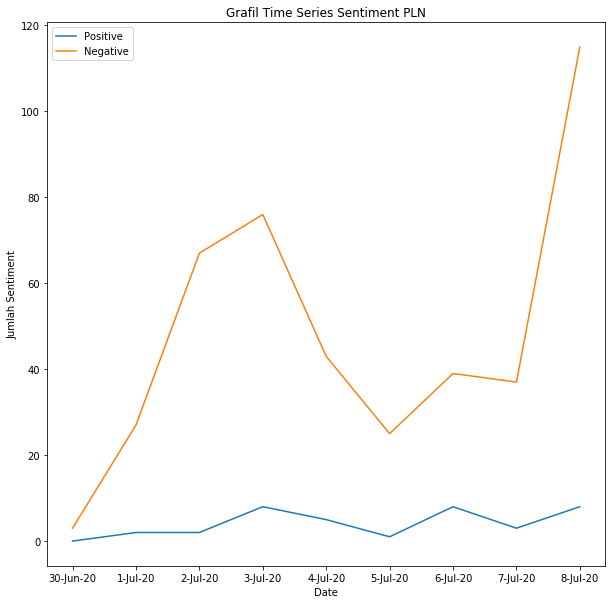

In [10]:
#ploting grafik
plt.plot(date, positive, label="Positive") #plot data tanggal dan positive, ke sumbu x dan y
plt.plot(date, negative, label="Negative") #plot data tanggal dan negative, ke sumbu x dan y
plt.legend()
plt.title('Grafil Time Series Sentiment PLN') #setting judul
plt.xlabel('Date') #setting sumbu x
plt.ylabel('Jumlah Sentiment') #setting sumbu Y
plt.rcParams["figure.figsize"] = (10,10) #ukuran frame
plt.show()


# Word Cloud Visualization

In [11]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [12]:
df = pd.read_csv("hasil.csv", encoding="latin-1")
comment_words = ''
stopwords = set(STOPWORDS)

In [13]:
#looping untuk mengumpulkan semua kata dari tweet
for val in df['tweet']:

    # ubah semua jadi format string
    val = str(val)

    # tweet di pisah, kata perkata
    tokens = val.split()

    # convert tweet jadi lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

In [19]:
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

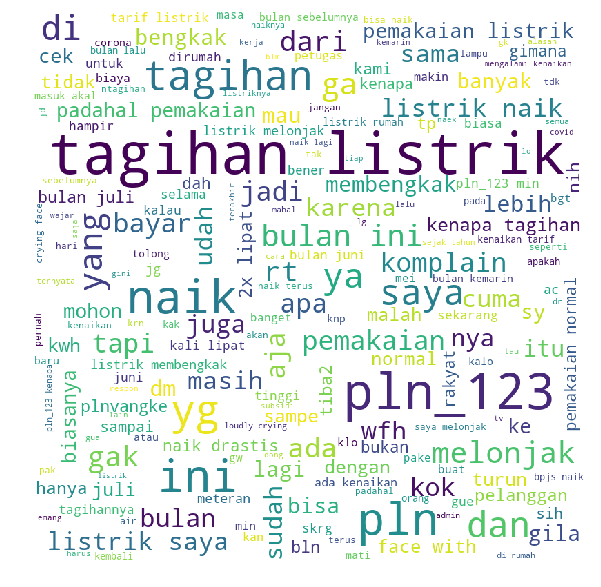

In [20]:
# plot untuk cloud word
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)


In [18]:
plt.show()